In [1]:
# import the libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# bring in the data
df = pd.read_csv('LAC_wells_onshore2.csv')
df.head()

,LeaseName,WellNumber,WellStatus,WellType,WellTypeLa,OperatorCo,OperatorNa,Latitude,Longitude
0,Chanchorena,1,Plugged,OG,Oil & Gas,S1375,Steven A. Sayce,33.593762,-118.023328
1,Lease by San Pedro-Point Fermin Oil & Gas Co.,1,Plugged,DH,Dry Hole,7633,San Pedro-Point Fermin Oil & Gas Co.,33.705338,-118.293968
2,Lease by Lighthouse Oil Co.,1,Idle,OG,Oil & Gas,9707,Lighthouse Oil Co.,33.708696,-118.291480
3,Lease by Los Angeles Harbor Oil Dev. Co.,1,Idle,OG,Oil & Gas,5421,Los Angeles Harbor Oil Dev. Co.,33.716400,-118.302544
4,Sepulveda,1,Plugged,DH,Dry Hole,8166,"Surety Holding Co., Ltd.",33.721802,-118.326088


In [3]:
# exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24246 entries, 0 to 24245
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LeaseName   24246 non-null  object 
 1   WellNumber  24246 non-null  object 
 2   WellStatus  24246 non-null  object 
 3   WellType    24246 non-null  object 
 4   WellTypeLa  24246 non-null  object 
 5   OperatorCo  24246 non-null  object 
 6   OperatorNa  24246 non-null  object 
 7   Latitude    24246 non-null  float64
 8   Longitude   24246 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [4]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,LeaseName,WellNumber,WellStatus,WellType,WellTypeLa,OperatorCo,OperatorNa,Latitude,Longitude,geometry
0,Chanchorena,1,Plugged,OG,Oil & Gas,S1375,Steven A. Sayce,33.593762,-118.023328,POINT (-118.02333 33.59376)
1,Lease by San Pedro-Point Fermin Oil & Gas Co.,1,Plugged,DH,Dry Hole,7633,San Pedro-Point Fermin Oil & Gas Co.,33.705338,-118.293968,POINT (-118.29397 33.70534)
2,Lease by Lighthouse Oil Co.,1,Idle,OG,Oil & Gas,9707,Lighthouse Oil Co.,33.708696,-118.291480,POINT (-118.29148 33.70870)
3,Lease by Los Angeles Harbor Oil Dev. Co.,1,Idle,OG,Oil & Gas,5421,Los Angeles Harbor Oil Dev. Co.,33.716400,-118.302544,POINT (-118.30254 33.71640)
4,Sepulveda,1,Plugged,DH,Dry Hole,8166,"Surety Holding Co., Ltd.",33.721802,-118.326088,POINT (-118.32609 33.72180)


In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

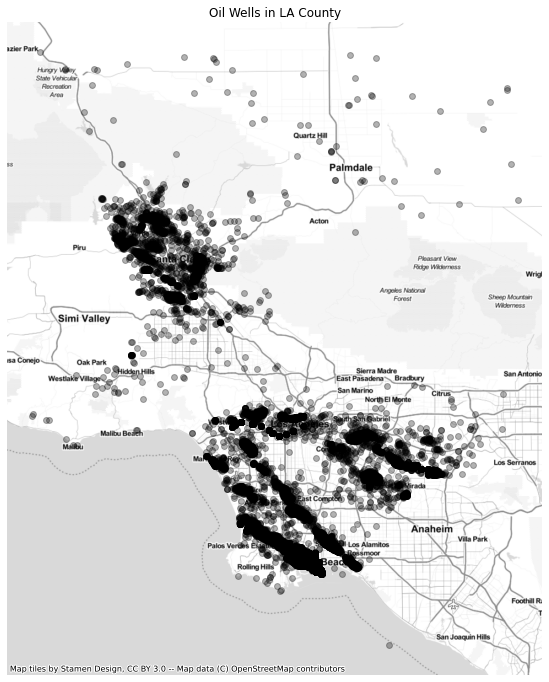

In [7]:
# map it
fig, ax = plt.subplots(figsize=(12,12))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=35,
                      alpha=.3,
                      color='black')

ax.axis('off')

ax.set_title('Oil Wells in LA County')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)


In [8]:
# create new tables that only include idle and plugged wells

gdfPLUGGED=gdf_web_mercator.loc[gdf_web_mercator['WellStatus']=='Plugged']
gdfPLUGGED.info()

gdfIDLE=gdf_web_mercator.loc[gdf_web_mercator['WellStatus']=='Idle']
gdfIDLE.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17039 entries, 0 to 24245
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LeaseName   17039 non-null  object  
 1   WellNumber  17039 non-null  object  
 2   WellStatus  17039 non-null  object  
 3   WellType    17039 non-null  object  
 4   WellTypeLa  17039 non-null  object  
 5   OperatorCo  17039 non-null  object  
 6   OperatorNa  17039 non-null  object  
 7   Latitude    17039 non-null  float64 
 8   Longitude   17039 non-null  float64 
 9   geometry    17039 non-null  geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 1.4+ MB
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3617 entries, 2 to 24232
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LeaseName   3617 non-null   object  
 1   WellNumber  3617 non-null   object  
 2   WellStatus  3617 non-null

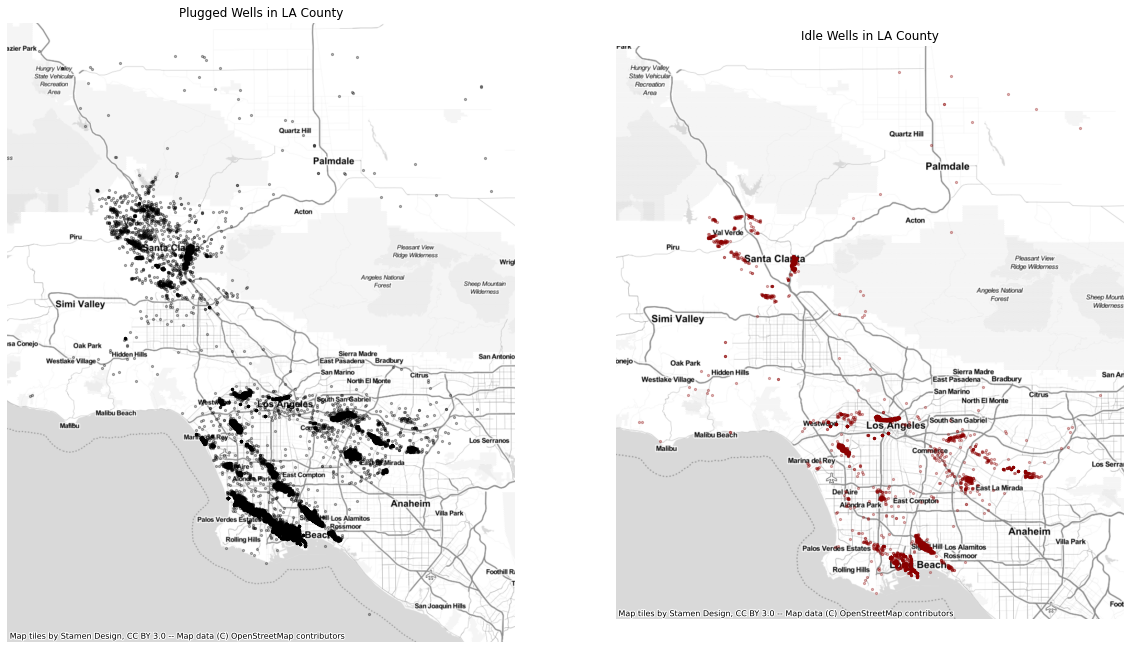

In [9]:
# there are roughly 5 times as many plugged wells as idle wells... but where?

# both maps together
fig, ax = plt.subplots(1,2,figsize=(20,20))

# plugged
gdfPLUGGED.plot(ax=ax[0], 
                      marker='o',
                      markersize=5,
                      color='black',
                      alpha=0.3)
ax[0].axis('off')
ax[0].set_title('Plugged Wells in LA County')

ctx.add_basemap(ax[0], source=ctx.providers.Stamen.TonerLite)

# idle
gdfIDLE.plot(ax=ax[1], 
                      marker='o',
                      markersize=5,
                      color='darkred',
                      alpha=0.3)
ax[1].axis('off')
ax[1].set_title('Idle Wells in LA County')

ctx.add_basemap(ax[1], source=ctx.providers.Stamen.TonerLite)